# Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays. The `plt` interface is what we will use most often

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If you are using Matplotlib from within a script, the function `plt.show()` is your friend.
`plt.show()` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

In [2]:
plt.style.use('seaborn-whitegrid')

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows

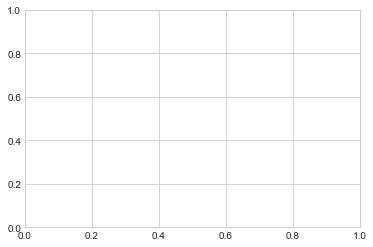

In [3]:
fig = plt.figure()
ax = plt.axes()

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. 

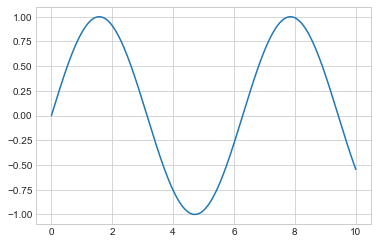

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)

ax.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the plot function multiple times

In [5]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

The `plt.plot()` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.

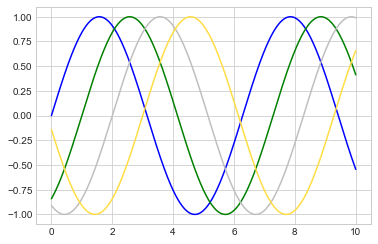

In [12]:
plt.plot(x, np.sin(x - 0), color='blue')     # specify color by name
plt.plot(x, np.sin(x - 1), color='g')        # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')     # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')  # Hex code (RRGGBB from 00 to FF)

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the `linestyle` keyword

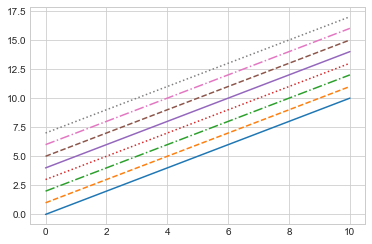

In [13]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

In [16]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods

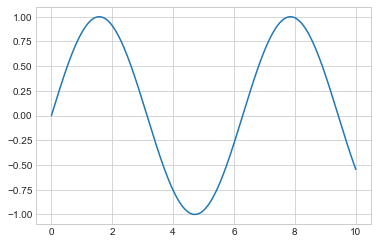

In [17]:
plt.plot(x, np.sin(x))

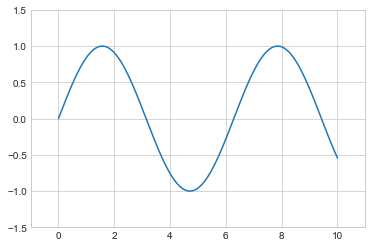

In [18]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``

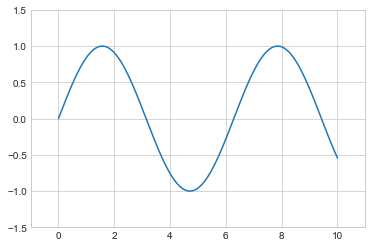

In [19]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

We'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them

In [20]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the ``plt.legend()`` method.

In [27]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Scatter Plot
We looked at ``plt.plot``/``ax.plot`` to produce line plots.
This same function can produce scatter plots as well

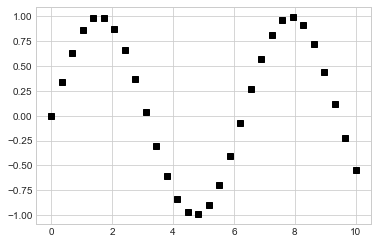

In [45]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'sk');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes.

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function

In [43]:
plt.scatter(x, y, marker='*');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

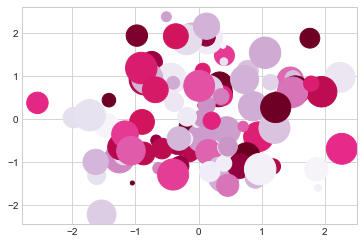

In [48]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, cmap='PuRd');

### Histogram

A simple histogram can be a great first step in understanding a dataset.

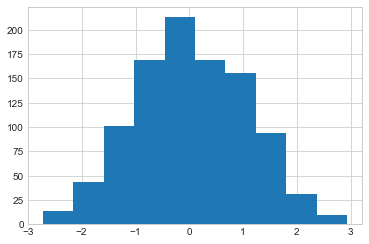

In [49]:
data = np.random.randn(1000)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display

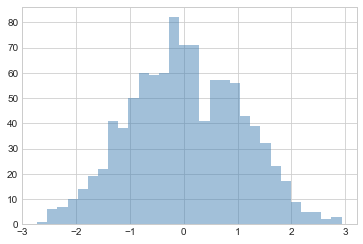

In [50]:
plt.hist(data, bins=30, alpha=0.5, 
         color='steelblue',
         edgecolor='none');

# Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.

Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

In [51]:
import pandas as pd
import seaborn as sns

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.

In [52]:
rs = np.random.RandomState(11)
x = rs.randn(1000)
y = -.5 * x + rs.normal(size=1000)

sns.histplot(x, alpha=0.5);

We can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions

In [53]:
sns.jointplot(x=x, y=y, kind='hex');

In [54]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``

In [55]:
sns.pairplot(iris, hue='species', height=2.5);

A heatmap is a plot of rectangular data as a color-encoded matrix. 

In [58]:
uniform_data.shape

(10, 12)

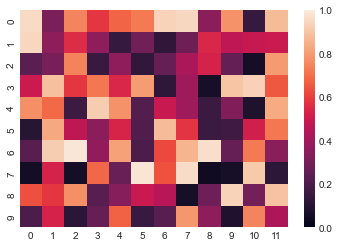

In [56]:
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data, vmin=0, vmax=1);